# 0.) Import the Credit Card Fraud Data From CCLE

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("fraudTest.csv")

In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

/var/folders/5j/08vl_fjx6cj5ylf8zh9tkxyr0000gn/T/ipykernel_929/2282180580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
/var/folders/5j/08vl_fjx6cj5ylf8zh9tkxyr0000gn/T/ipykernel_929/2282180580.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [8]:
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_holdout = scaler.transform(X_holdout)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [10]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [82]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train, y_train)

smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_train, y_train)

# 3.) Train three logistic regression models

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
over_log = LogisticRegression().fit(over_X, over_y)

under_log = LogisticRegression().fit(under_X, under_y)

smote_log = LogisticRegression().fit(smote_X, smote_y)

# 4.) Test the three models

In [14]:
over_log.score(X_test, y_test)

0.9147412365939682

In [15]:
under_log.score(X_test, y_test)

0.9174644305285635

In [16]:
smote_log.score(X_test, y_test)

0.910398522037477

In [17]:
# We see SMOTE performing with higher accuracy but is ACCURACY really the best measure?

# 5.) Which performed best in Out of Sample metrics?

In [18]:
# Sensitivity here in credit fraud is more important as seen from last class

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
y_true = y_test

In [21]:
y_pred = over_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[76018,  7028],
       [   79,   233]])

In [22]:
print("Over Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Over Sample Sensitivity :  0.7467948717948718


In [23]:
y_pred = under_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[76245,  6801],
       [   79,   233]])

In [24]:
print("Under Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Under Sample Sensitivity :  0.7467948717948718


In [25]:
y_pred = smote_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[75656,  7390],
       [   79,   233]])

In [26]:
print("SMOTE Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

SMOTE Sample Sensitivity :  0.7467948717948718


# 6.) Pick two features and plot the two classes before and after SMOTE.

In [78]:
# Concatenate features and target variable along with column names
feature_names = X.columns.tolist()  
raw_temp_with_names = np.concatenate([X_train, y_train.to_numpy().reshape(-1, 1)], axis=1)

# Create a DataFrame with column names
raw_temp = pd.DataFrame(raw_temp_with_names, columns=feature_names + ['is_fraud'])

In [79]:
raw_temp.head()

,amt,city_pop,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,is_fraud
0,-0.240871,-0.291379,-1.299428,-0.278461,-0.275751,-0.336697,-0.189893,-0.322771,3.756776,-0.322955,-0.309548,-0.227596,-0.25798,-0.275783,-0.285237,-0.31314,-0.180257,0.0
1,-0.351157,-0.272453,-1.010586,-0.278461,-0.275751,-0.336697,-0.189893,-0.322771,-0.266186,3.096403,-0.309548,-0.227596,-0.25798,-0.275783,-0.285237,-0.31314,-0.180257,0.0
2,-0.022074,-0.276563,-1.703807,-0.278461,-0.275751,-0.336697,-0.189893,-0.322771,-0.266186,3.096403,-0.309548,-0.227596,-0.25798,-0.275783,-0.285237,-0.31314,-0.180257,0.0
3,-0.384540,-0.291143,-1.010586,-0.278461,-0.275751,-0.336697,-0.189893,-0.322771,-0.266186,-0.322955,-0.309548,-0.227596,-0.25798,-0.275783,3.505862,-0.31314,-0.180257,0.0
4,-0.316696,-0.291857,-1.472733,-0.278461,-0.275751,-0.336697,-0.189893,-0.322771,-0.266186,-0.322955,-0.309548,4.393744,-0.25798,-0.275783,-0.285237,-0.31314,-0.180257,0.0


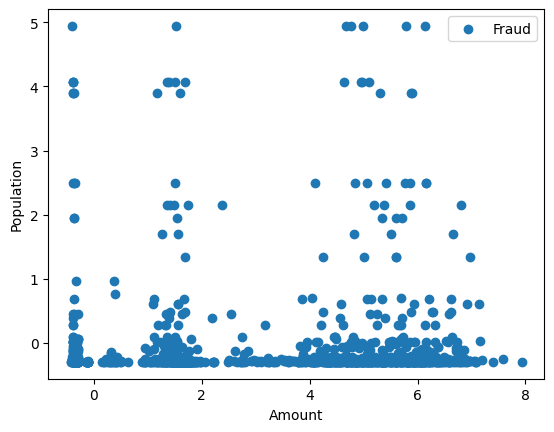

In [80]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend(["Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

In [86]:
#raw_temp = pd.concat([smote_X, smote_y], axis =1)
# Concatenate features and target variable along with column names
feature_names = X.columns.tolist()  
raw_temp_with_names = np.concatenate([smote_X, smote_y.to_numpy().reshape(-1, 1)], axis=1)

# Create a DataFrame with column names
raw_temp = pd.DataFrame(raw_temp_with_names, columns=feature_names + ['is_fraud'])


/Users/kanupriya1190/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


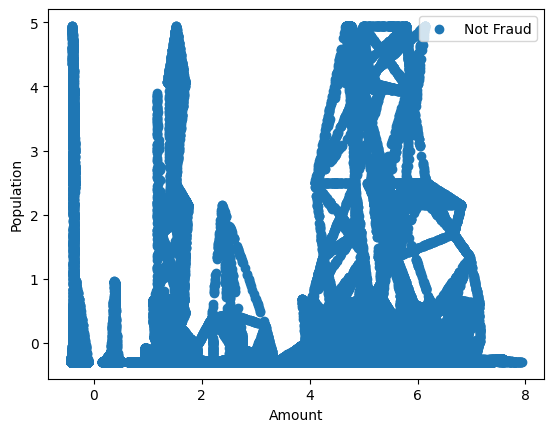

In [87]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend([ "Not Fraud", "Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

# 7.) We want to compare oversampling, Undersampling and SMOTE across our 3 models (Logistic Regression, Logistic Regression Lasso and Decision Trees).

# Make a dataframe that has a dual index and 9 Rows.
# Calculate: Sensitivity, Specificity, Precision, Recall and F1 score. for out of sample data.
# Notice any patterns across perfomance for this model. Does one totally out perform the others IE. over/under/smote or does a model perform better DT, Lasso, LR?
# Choose what you think is the best model and why. test on Holdout

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

In [47]:
resampling_methods = {"over":RandomOverSampler(), "under":RandomUnderSampler(), "smote":SMOTE()}
model_configs = {"LOG":LogisticRegression(), "LASSO":LogisticRegression(penalty="l1", C= 2., solver="liblinear"), "DTREE":DecisionTreeClassifier()}

In [48]:
def calc_perform_metrics(y_true,y_pred):
    tp,tn,fp,fn = confusion_matrix(y_true,y_pred).ravel()
    sensitivity= tp / (tp+fn)
    specificity= tn / (tn+fp)
    precision= precision_score(y_true,y_pred)
    recall= recall_score(y_true,y_pred)
    f1= f1_score(y_true,y_pred)
    return(sensitivity, specificity, precision, recall, f1)

In [49]:
trained_models = {}
results = []

In [50]:
for resample_keys, resampler in resampling_methods.items():
    resample_x, resample_y = resampler.fit_resample(X_train, y_train)
    
    for model_key, model in model_configs.items():
        combined_key =f"{resample_keys}_{model_key}"
        m = model.fit(resample_x, resample_y)
        trained_models[combined_key] = m
        y_pred = m.predict(X_test)
        sensitivity, specificity, precision, recall, f1=calc_perform_metrics(y_true,y_pred)
        results.append({"Model": combined_key, "Sensitivity": sensitivity, "Specificity" : specificity, "Precision": precision, "Recall": recall, "F1": f1 })

In [51]:
trained_models

{'over_LOG': LogisticRegression(),
 'over_LASSO': LogisticRegression(C=2.0, penalty='l1', solver='liblinear'),
 'over_DTREE': DecisionTreeClassifier(),
 'under_LOG': LogisticRegression(),
 'under_LASSO': LogisticRegression(C=2.0, penalty='l1', solver='liblinear'),
 'under_DTREE': DecisionTreeClassifier(),
 'smote_LOG': LogisticRegression(),
 'smote_LASSO': LogisticRegression(C=2.0, penalty='l1', solver='liblinear'),
 'smote_DTREE': DecisionTreeClassifier()}

In [52]:
result_dt = pd.DataFrame(results)

In [53]:
result_dt.head(100)

,Model,Sensitivity,Specificity,Precision,Recall,F1
0,over_LOG,0.996943,0.988928,0.031966,0.746795,0.061308
1,over_LASSO,0.996944,0.988915,0.032001,0.746795,0.061372
2,over_DTREE,0.997990,0.498270,0.536977,0.535256,0.536116
3,under_LOG,0.996835,0.991717,0.024444,0.750000,0.047344
4,under_LASSO,0.996832,0.991783,0.024254,0.750000,0.046988
5,under_DTREE,0.996252,0.996333,0.053712,0.939103,0.101613
6,smote_LOG,0.996929,0.989448,0.030493,0.746795,0.058594
7,smote_LASSO,0.996929,0.989447,0.030497,0.746795,0.058602
8,smote_DTREE,0.997494,0.863459,0.237658,0.663462,0.349958


Based on the table:

1)Models over_LOG, over_LASSO, under_LOG, under_LASSO, smote_LOG, and smote_LASSO have very high Sensitivity but very low Precision, which means they are good at identifying positive instances but also incorrectly label many negatives as positives (likely many false positives).
2)The over_DTREE model has high Sensitivity but very low Specificity, suggesting it labels almost all samples as positive, regardless of their true label.
3)The under_DTREE model has a much better balance across all metrics, with a particularly high F1 score compared to the others.
4)The smote_DTREE model has moderate values for Precision and Recall, indicating a balance between identifying positive instances and correctly labeling negative instances.

The under_DTREE model is the best model overall as per the test data, it has a good balance of sensitivity and specificity with a relatively higher F1 score, which shows a good balance between Precision and Recall. This will perform the best on unseeen data as compared to other models. 

In [54]:
#testing on holdout data
y_true1 = y_holdout
y_pred1 = over_log.predict(X_holdout)
calc_perform_metrics(y_true1,y_pred1)

(0.9966296408010177,
 0.9885995777621394,
 0.035297349265210824,
 0.7603550295857988,
 0.06746292164326027)

In [61]:
trained_models1 = {}
results1 = []

In [69]:
for resample_keys, resampler in resampling_methods.items():
    resample_x, resample_y = resampler.fit_resample(X_train, y_train)
    
    for model_key, model in model_configs.items():
        combined_key =f"{resample_keys}_{model_key}"
        m = model.fit(resample_x, resample_y)
        trained_models[combined_key] = m
        y_pred1 = m.predict(X_holdout)
        sensitivity, specificity, precision, recall, f1=calc_perform_metrics(y_true1,y_pred1)
        results1.append({"Model": combined_key, "Sensitivity": sensitivity, "Specificity" : specificity, "Precision": precision, "Recall": recall, "F1": f1 })

In [70]:
trained_models1

{}

In [71]:
result_dt1 = pd.DataFrame(results1)
result_dt1

,Model,Sensitivity,Specificity,Precision,Recall,F1
0,over_LOG,0.996630,0.988592,0.035322,0.760355,0.067507
1,over_LASSO,0.996630,0.988588,0.035331,0.760355,0.067525
2,over_DTREE,0.997629,0.469925,0.611801,0.582840,0.596970
3,under_LOG,0.996667,0.987025,0.040037,0.760355,0.076069
4,under_LASSO,0.996666,0.987102,0.039808,0.760355,0.075655
5,under_DTREE,0.995888,0.996938,0.066366,0.958580,0.124138
6,smote_LOG,0.996614,0.989129,0.033696,0.760355,0.064532
7,smote_LASSO,0.996614,0.989126,0.033705,0.760355,0.064549
8,smote_DTREE,0.997024,0.868006,0.289072,0.727811,0.413793


From the above results, using it on the holdout data, we again notice that the under_DTREE is the best model which has high scores of Sensitivity and Specificity with a relatively good F1 score, showing a balance between Precision and Recall. This model would perform the best, while also minimizing errors across metrics. 